<a href="https://colab.research.google.com/github/KerollinDiniz/Estat-stica-com-Python/blob/main/Kerollin_Nogueira_Diniz_da_Silveira_Bittencourt_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Impotar bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


# **Desafio Prático 1: Visualizando Dados Diferentes**

Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos dados, correlações entre variáveis e tendências.

1. Carregar os dados de um arquivo CSV fornecido (saude.csv).

In [ ]:
df_saude = pd.read_csv('/content/drive/MyDrive/Desafios Bootcamp WoMekersCode/saude.csv')

In [ ]:
df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


In [ ]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   age     10 non-null     int64 
 2   height  10 non-null     int64 
 3   weight  10 non-null     int64 
 4   gender  10 non-null     object
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [ ]:
df_saude.describe()

,id,age,height,weight
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,34.800000,167.800000,72.600000
std,3.02765,8.753412,7.857056,11.057426
min,1.00000,23.000000,155.000000,55.000000
25%,3.25000,28.250000,161.250000,65.750000
50%,5.50000,35.000000,169.000000,72.500000
75%,7.75000,39.500000,173.750000,79.500000
max,10.00000,50.000000,180.000000,90.000000


2. Criar um histograma da variável 'age' usando Matplotlib.

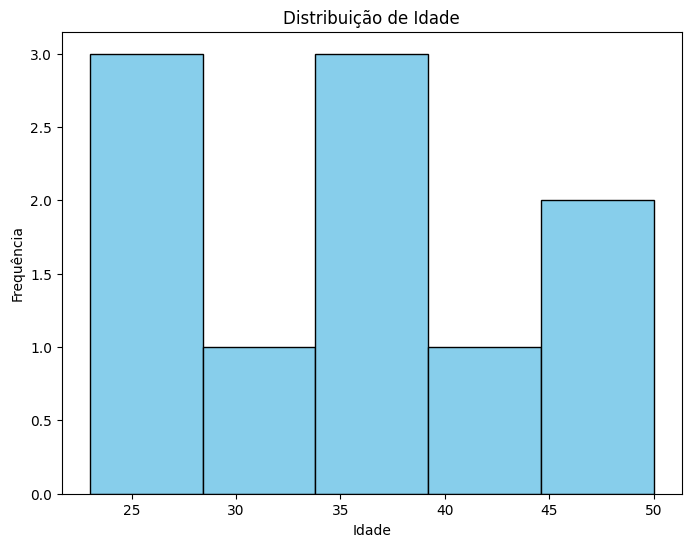

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_saude['age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando Seaborn.

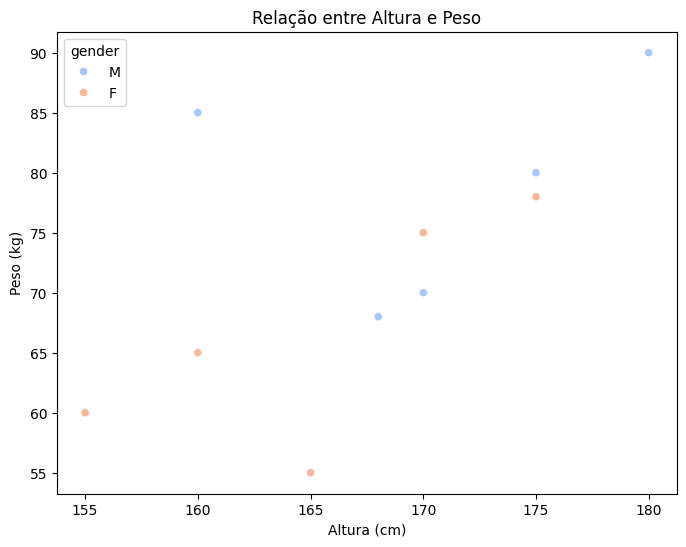

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='weight', data=df_saude, hue='gender', palette='coolwarm')
plt.title('Relação entre Altura e Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por 'gender' usando Plotly.

In [ ]:
gender_counts = df_saude['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

fig = px.bar(gender_counts, x='gender', y='count',
             labels={'gender': 'Gênero', 'count': 'Contagem'},
             title='Contagem de Indivíduos por Gênero')

# Exibir o gráfico
fig.show()

# **Desafio Prático 2: Séries Temporais**

Neste desafio, suas alunas irão analisar uma série temporal de dados de vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar tendências e sazonalidades.

1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).

In [ ]:
df_vendas = pd.read_csv('/content/drive/MyDrive/Desafios Bootcamp WoMekersCode/vendas.csv')

In [ ]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [ ]:
df_vendas.describe()

,sales
count,31.000000
mean,258.387097
std,82.101432
min,100.000000
25%,200.000000
50%,250.000000
75%,325.000000
max,400.000000


In [ ]:
df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.

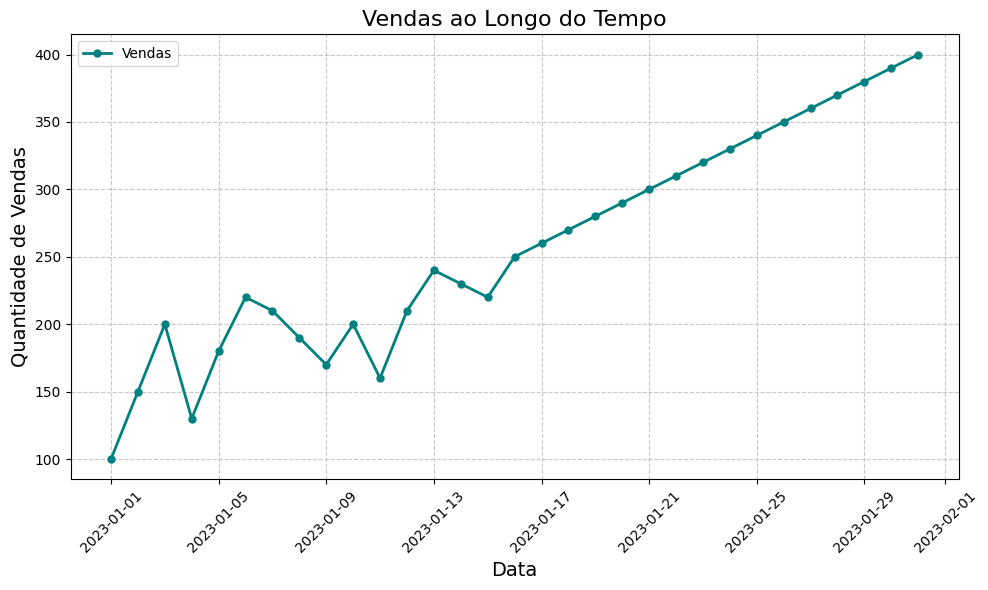

In [ ]:
df_vendas['date'] = pd.to_datetime(df_vendas['date'])

# Ordenar o DataFrame pelas datas, se necessário
df_vendas = df_vendas.sort_values(by='date')

# Criar o gráfico de linhas das vendas ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df_vendas['date'], df_vendas['sales'], color='teal', linewidth=2, marker='o', markersize=5, label='Vendas')

# Personalização do gráfico
plt.title('Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade de Vendas', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()

3. Criar um gráfico de decomposição sazonal usando Seaborn.

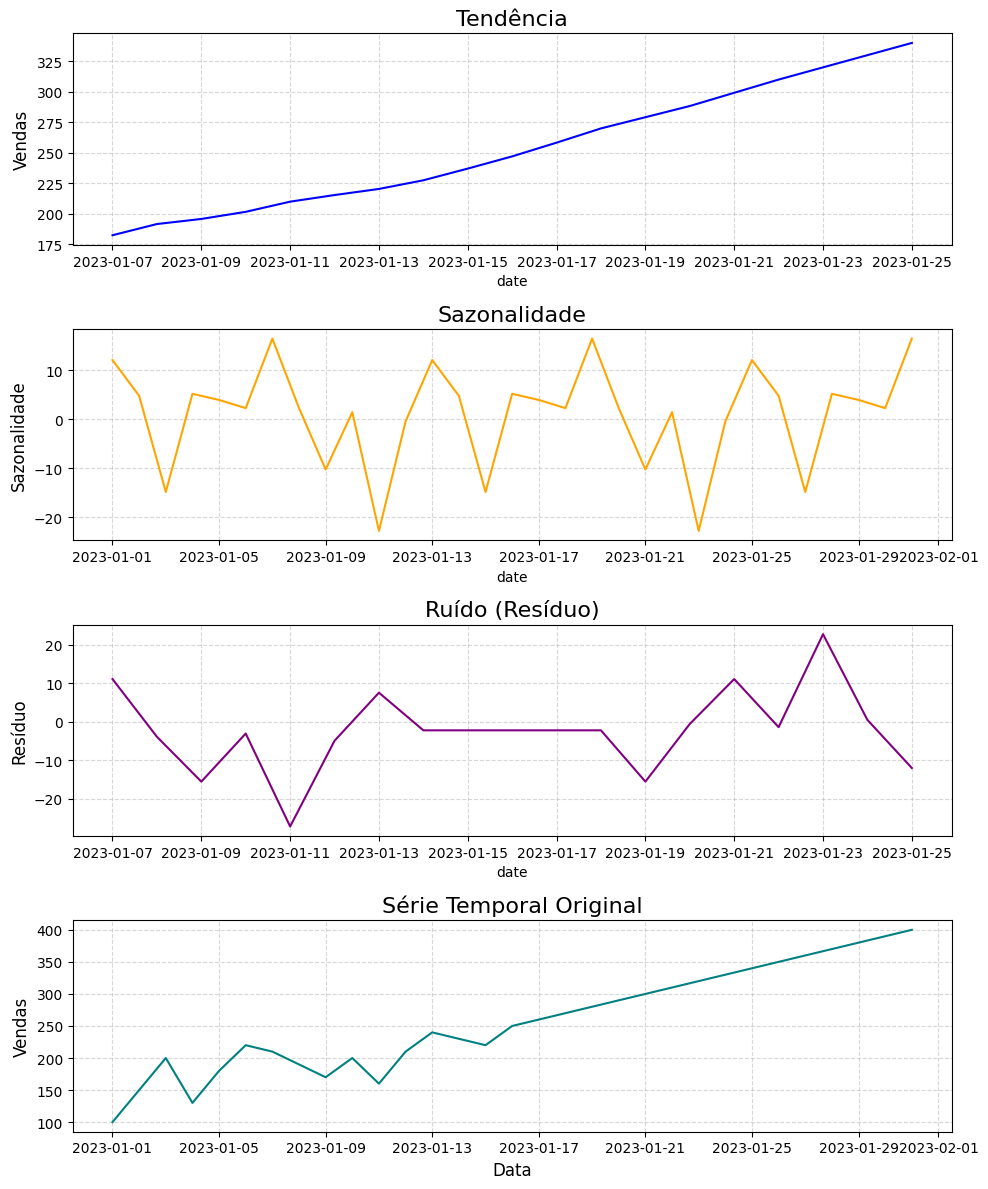

In [ ]:
df_vendas['date'] = pd.to_datetime(df_vendas['date'])
df_vendas = df_vendas.set_index('date')  # Definir a coluna de datas como índice

# Realizar a decomposição sazonal
decomposicao = seasonal_decompose(df_vendas['sales'], model='additive', period=12)

plt.figure(figsize=(10, 12))

# Componente da tendência
plt.subplot(4, 1, 1)
sns.lineplot(x=decomposicao.trend.index, y=decomposicao.trend, color='b')
plt.title('Tendência', fontsize=16)
plt.ylabel('Vendas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Componente da sazonalidade
plt.subplot(4, 1, 2)
sns.lineplot(x=decomposicao.seasonal.index, y=decomposicao.seasonal, color='orange')
plt.title('Sazonalidade', fontsize=16)
plt.ylabel('Sazonalidade', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(4, 1, 3)
sns.lineplot(x=decomposicao.resid.index, y=decomposicao.resid, color='purple')
plt.title('Ruído (Resíduo)', fontsize=16)
plt.ylabel('Resíduo', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(4, 1, 4)
sns.lineplot(x=df_vendas.index, y=df_vendas['sales'], color='teal')
plt.title('Série Temporal Original', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vendas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly.

In [ ]:
df_vendas['date'] = pd.to_datetime(df_vendas['date'])

# Criar o gráfico interativo
fig = px.line(df_vendas, x='date', y='sales',
              title='Vendas ao Longo do Tempo',
              labels={'date': 'Data', 'sales': 'Quantidade de Vendas'})

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},  # Centralizar o título
    xaxis_title='Data',
    yaxis_title='Quantidade de Vendas',
    template='plotly_white',  # Tema claro para melhor visualização
    xaxis_rangeslider_visible=True  # Adicionar o controle deslizante no eixo x
)

# Exibir o gráfico
fig.show()